# Import Packages

In [1]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

import cv2
import tensorflow as tf
from tqdm import tqdm

In [2]:
class_names = ['Pepper__bell___Bacterial_spot','Pepper__bell___healthy','Potato___Early_blight','Potato___healthy','Potato___Late_blight','Tomato__Target_Spot','Tomato__Tomato_mosaic_virus','Tomato__Tomato_YellowLeaf__Curl_Virus','Tomato_Bacterial_spot','Tomato_Early_blight','Tomato_healthy','Tomato_Late_blight','Tomato_Leaf_Mold','Tomato_Septoria_leaf_spot','Tomato_Spider_mites_Two_spotted_spider_mite']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

# Loading the Data
We have to write a load_data function that load the images and the labels from the folder.

In [3]:
def load_data():

    datasets = ['C:/Users/Hp/Music/pepper leaf/dataset/train', 'C:/Users/Hp/Music/pepper leaf/dataset/test']

    output = []

    # Iterate through training and test sets
    for dataset in datasets:

        images = []
        labels = []

        print("Loading {}".format(dataset))

        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]

            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):

                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)

                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)

                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)

        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')

        output.append((images, labels))

    return output

In [4]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading C:/Users/Hp/Music/pepper leaf/dataset/train


100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 668.21it/s]


Loading C:/Users/Hp/Music/pepper leaf/dataset/test


100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 673.06it/s]


In [5]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [6]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 1501
Number of testing examples: 1501
Each image is of size: (150, 150)


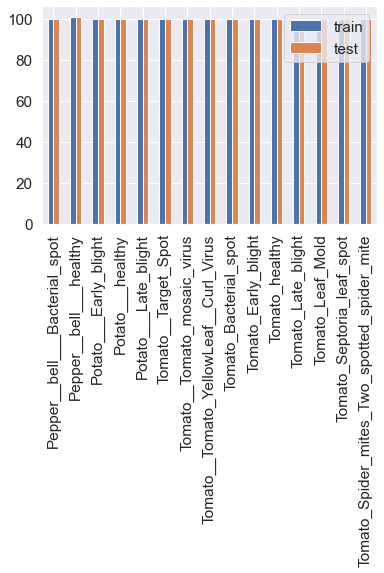

In [7]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts},
             index=class_names
            ).plot.bar()
plt.show()

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [9]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """

    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(5):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

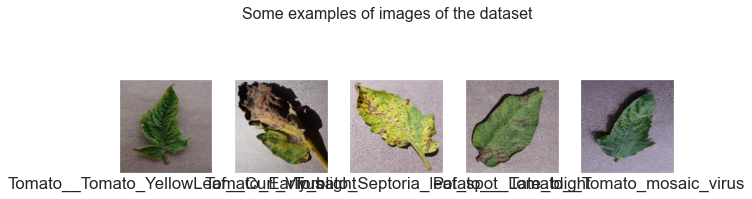

In [10]:
display_examples(class_names, train_images, train_labels)

In [11]:
batch_size =15
epochs = 10
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [12]:
rcnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(15, activation=tf.nn.softmax)
])

In [13]:
rcnn_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
history = rcnn_model.fit(train_images, train_labels, batch_size=128, epochs=10, validation_split = 0.2)

Epoch 1/10
10/10 [==============================] - 17s 2s/step - loss: 2.8962 - accuracy: 0.0817 - val_loss: 2.6280 - val_accuracy: 0.0963
Epoch 2/10
10/10 [==============================] - 15s 1s/step - loss: 2.5515 - accuracy: 0.1808 - val_loss: 2.4280 - val_accuracy: 0.2126
Epoch 3/10
10/10 [==============================] - 15s 1s/step - loss: 2.1769 - accuracy: 0.3442 - val_loss: 1.9767 - val_accuracy: 0.3953
Epoch 4/10
10/10 [==============================] - 16s 2s/step - loss: 1.6729 - accuracy: 0.4858 - val_loss: 1.7076 - val_accuracy: 0.4551
Epoch 5/10
10/10 [==============================] - 15s 2s/step - loss: 1.3087 - accuracy: 0.6008 - val_loss: 1.4287 - val_accuracy: 0.5548
Epoch 6/10
10/10 [==============================] - 15s 1s/step - loss: 0.9570 - accuracy: 0.7142 - val_loss: 1.3229 - val_accuracy: 0.5648
Epoch 7/10
10/10 [==============================] - 15s 1s/step - loss: 0.7350 - accuracy: 0.7775 - val_loss: 1.2379 - val_accuracy: 0.6346
Epoch 8/10
10/10 [==

In [15]:
test_loss = rcnn_model.evaluate(test_images, test_labels)

47/47 [==============================] - 5s 106ms/step - loss: 0.3846 - accuracy: 0.9021


1/1 [==============================] - 0s 131ms/step
[10]


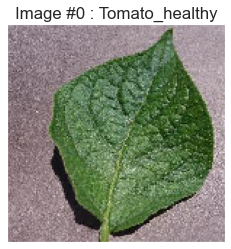

In [16]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
test_image = image.load_img('C:/Users/Hp/Music/pepper leaf/dataset/test/Potato___healthy/57c2663b-5d1d-4476-b067-38b2149c3b2d___RS_HL 1796.JPG', target_size = (150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
predictions = rcnn_model.predict(test_image)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability
print(pred_labels )
index = np.random.randint(test_image.shape[0])
plt.figure()
plt.imshow(test_image[index].astype('uint8'))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.title('Image #{} : '.format(index) + class_names[pred_labels[index]])
plt.show()

In [ ]:
rcnn_model.save_weights("model_vgg.h5")
print("Saved model to disk")

In [ ]:
rcnn_model_json=rcnn_model.to_json()
with open("model_vgg.json", "w") as json_file:
    json_file.write(rcnn_model_json)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
import numpy as np
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
import numpy as np
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import tensorflow as tf
from flask import Flask, render_template, request, send_from_directory

app = Flask(__name__)


UPLOAD_FOLDER = "uploads"
STATIC_FOLDER = "static"
json_file = open('model_vgg.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
cnn_model = model_from_json(loaded_model_json)
# load weights into new model
cnn_model.load_weights("model_vgg.h5")
# Load model

IMAGE_SIZE = 150

# Preprocess an image
def preprocess_image(image):
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [IMAGE_SIZE, IMAGE_SIZE])
    image /= 255.0  # normalize to [0,1] range

    return image


# Read the image from path and preprocess
def load_and_preprocess_image(path):
    image = tf.io.read_file(path)

    return preprocess_image(image)


# Predict & classify image
def classify(model, image_path):

    preprocessed_imgage = load_and_preprocess_image(image_path)
    preprocessed_imgage = tf.reshape(
        preprocessed_imgage, (1, IMAGE_SIZE, IMAGE_SIZE, 3)
    )

    prob = cnn_model.predict(preprocessed_imgage)
    label = "Pepper leaf" if prob[0][0] >= 0.5 else "Healthy"
    classified_prob = prob[0][0] if prob[0][0] >= 0.5 else 1 - prob[0][0]

    return label, classified_prob


# home page
@app.route("/")
def home():
    return render_template("home.html")


@app.route("/classify", methods=["POST", "GET"])
def upload_file():

    if request.method == "GET":
        return render_template("home.html")

    else:
        file = request.files["image"]
        upload_image_path = os.path.join(UPLOAD_FOLDER, file.filename)
        print(upload_image_path)
        file.save(upload_image_path)

        label, prob = classify(cnn_model, upload_image_path)

        prob = round((prob * 100), 2)

    return render_template(
        "classify.html", image_file_name=file.filename, label=label, prob=prob
    )


@app.route("/classify/<filename>")
def send_file(filename):
    return send_from_directory(UPLOAD_FOLDER, filename)


if __name__ == "__main__":
    
    app.run()
   
